In [66]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [67]:
df=pd.read_csv('/Users/michaelrosen/Desktop/Housing_Modeling/Data/JOINED_CENSUS_LISTINGS_MAY_27.csv')

In [68]:
colstokeep=['posted','post title','neighborhood','URL','price','latlon','y','x']

In [69]:
df=df[colstokeep]

In [70]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.x, df.y))

In [71]:
df2=gpd.read_file('/Users/michaelrosen/Desktop/Housing_Modeling/Data/Grand_Gdf.geojson')

In [72]:
model=gpd.sjoin(gdf.set_crs(epsg=4326),df2)

In [73]:
model=model.dropna()

In [74]:
model_test = model.drop_duplicates(subset = ["post title"])

In [75]:
model_test['high_ed']=model_test['PctBachelor']+model_test['PctMasters']+model_test['PctDoctorate']

/Users/michaelrosen/opt/anaconda3/envs/uds/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [78]:
model_test['price'] = model_test['price'].str.replace(',','')

/Users/michaelrosen/opt/anaconda3/envs/uds/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [79]:
model_test['price']= model_test['price'].apply(pd.to_numeric, errors='coerce')

In [80]:
model_test.head()

,posted,post title,neighborhood,URL,price,latlon,y,x,geometry,index_right,...,EducDoct,PctNHW,PctBlackAA,PctAsian,pctPOC,PctBachelor,PctMasters,PctDoctorate,permit_count,high_ed
3,2022-05-25 12:16,Recently Updated 3 Bedroom 2 Bath Quiet Walk S...,(Venice Beach),https://losangeles.craigslist.org/wst/apa/d/ve...,5500,"['33.980825', '-118.467207']",33.980825,-118.467207,POINT (-118.46721 33.98083),59,...,99.0,87.822791,1.800521,3.837953,12.177209,43.043599,23.965565,2.749236,48.0,69.7584
5,2022-05-25 12:15,Large 3 Bedroom 2 Bath on Quiet Walk Street St...,(Venice),https://losangeles.craigslist.org/wst/apa/d/ve...,5500,"['33.980825', '-118.467207']",33.980825,-118.467207,POINT (-118.46721 33.98083),59,...,99.0,87.822791,1.800521,3.837953,12.177209,43.043599,23.965565,2.749236,48.0,69.7584
6,2022-05-25 10:55,"2 bed, 1 bath upper unit on canals",(Venice),https://losangeles.craigslist.org/wst/apa/d/ve...,3990,"['33.984666', '-118.463795']",33.984666,-118.463795,POINT (-118.46380 33.98467),59,...,99.0,87.822791,1.800521,3.837953,12.177209,43.043599,23.965565,2.749236,48.0,69.7584
7,2022-05-25 10:32,"Fitness Center, Sundeck, Newly Renovated, Stud...",(Close to the Beach),https://losangeles.craigslist.org/wst/apa/d/ve...,2850,"['33.981644', '-118.463038']",33.981644,-118.463038,POINT (-118.46304 33.98164),59,...,99.0,87.822791,1.800521,3.837953,12.177209,43.043599,23.965565,2.749236,48.0,69.7584
8,2022-05-25 09:05,Brand New Studio! 5 Blocks from Beach!,(Marina del Rey),https://losangeles.craigslist.org/wst/apa/d/ve...,2250,"['33.982676', '-118.461387']",33.982676,-118.461387,POINT (-118.46139 33.98268),59,...,99.0,87.822791,1.800521,3.837953,12.177209,43.043599,23.965565,2.749236,48.0,69.7584


In [81]:
xvars = ['permit_count', 'high_ed','PctNHW','PctBlackAA','PctAsian','pctPOC','Median HHI']
yvar = 'price'
X_train, X_test, y_train, y_test = train_test_split(
    model_test[xvars], model_test[yvar], test_size = 0.3, random_state = 1)

In [82]:
rf = RandomForestRegressor(n_estimators = 50, random_state = 1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [83]:
np.abs(y_pred-y_test).sum()

880938.6702366977

In [85]:
a=y_test
e=y_pred
c=np.array(y_test)
d=np.array(y_pred)
m, b = np.polyfit(c, d, 1)

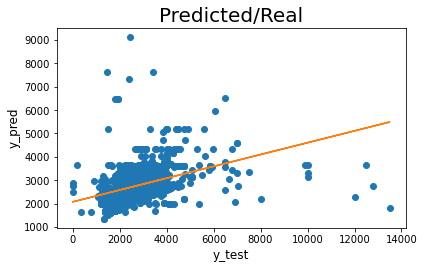

In [86]:
plt.plot(a,e,'o')
plt.plot(c, m*c + b)
plt.title(label="Predicted/Real",
          fontsize=20,
          color="black",)
plt.xlabel('y_test', fontsize=12)
plt.ylabel('y_pred', fontsize=12)
plt.tight_layout()
plt.subplots_adjust(top=0.85)

In [87]:
np.corrcoef(y_pred,y_test)

array([[1.        , 0.40420003],
       [0.40420003, 1.        ]])